In [ ]:
### To-Do
# X) make fit_function general enough for pswarms optimization -> dropout rate, layers, nodes, etc
# X) write function that runs fit_function ~5 times and keeps ensemble + best
# X) put all this in a script
# X) save output distribution and history plots in model directory
# X) log file of some kind?
# X) e_sig vs (1-e_bkg) plot
# X) add sig text to preds plot
# X) implement pyswarms optimization
# -) ... 
# N) k-fold validation

In [1]:
import sys, os
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [2]:
from lorentzBoostAnalyzer import lorentzBoostAnalyzer as lba
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import multiprocessing as mp

Using TensorFlow backend.


Dihiggs file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/pp2hh4b_500kEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv
QCD file:  /home/btannenw/Desktop/ML/dihiggsMLProject/data/ppTo4b_2MEvents_0PU_v2-05__top4inPt-4tags-10jets_combined_csv.csv


(array([3.3195e+04, 4.0870e+04, 2.5949e+04, 1.1225e+04, 3.8130e+03,
        1.1030e+03, 2.6100e+02, 5.6000e+01, 5.0000e+00, 4.0000e+00]),
 array([ 4. ,  4.9,  5.8,  6.7,  7.6,  8.5,  9.4, 10.3, 11.2, 12.1, 13. ]),
 <a list of 10 Patch objects>)

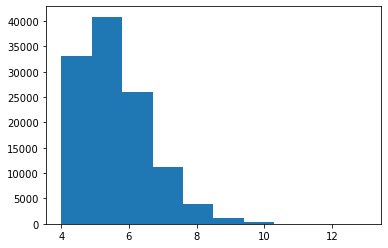

In [3]:
#*** 1. Import data and check stuff
testingFraction = 0.3

# *** A. Import Dataset
hh_raw, qcd_raw = importDatasets()

plt.hist(qcd_raw.nJets, bins=10)

In [4]:
test0 = lba(nJets=8, signalData= hh_raw, backgroundData = qcd_raw, modelName= 'testPSO_v5', testingFraction=testingFraction)
test0.makeJetVectors()

N_sig = 78876 , N_bkg = 116481
195357 rows of total data with  195357 labels [Train+Test]
136749 rows of training data with  136749 labels [Train]
58608 rows of testing data with  58608 labels [Test]
(136749, 32)


In [5]:
# *** 1. Split testing data into signal and background samples                                                                                                                                             
#hh_data_test, hh_labels_test, qcd_data_test, qcd_labels_test = returnTestSamplesSplitIntoSignalAndBackground(self.testVectorsByEvent, self.testLabelsByEvent)

# """ 2. Make predictions                                                                                                                                                                                  
#pred_hh = _model.predict(np.array(hh_data_test))
#pred_qcd = _model.predict(np.array(qcd_data_test))

In [6]:
def f_LBN_swarm(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    
    n_particles = x.shape[0]
    #j = [forward_prop(x[i]) for i in range(n_particles)]
    j = [ test0.fit_swarm( epochs=3, batch_size=400, patience=10, 
                         model_hyperparams={'nodesInFirstHiddenLayer':int(x[i][0]), 'nodesInSecondHiddenLayer':int(x[i][1])
                                              }
                        ) 
         for i in range(n_particles) 
        ]
    
    return np.array(j)
    

2020-01-27 12:00:04,858 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.2 µs


pyswarms.single.global_best:   0%|          |0/10

<ForkProcess(ForkPoolWorker-1, started daemon)> 7269 1
<ForkProcess(ForkPoolWorker-2, started daemon)> 7270 2
<ForkProcess(ForkPoolWorker-3, started daemon)> 7271 3
<ForkProcess(ForkPoolWorker-4, started daemon)> 7272 4
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 42
++ Setting hyperparameters...
nodesInSecondHiddenLayer = 90
nLBNParticles = 5
hiddenActivation = relu
nodesInFirstHiddenLayer = 46
nodesInFirstHiddenLayer = 186
outputActivation = sigmoid
nodesInFirstHiddenLayer = 120
lossFunction = binary_crossentropy
nodesInSecondHiddenLayer = 109
nodesInSecondHiddenLayer = 4
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ Be

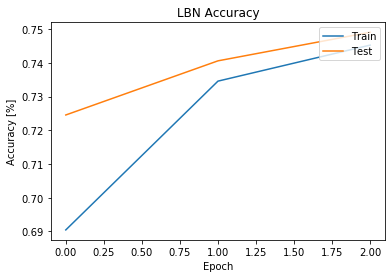

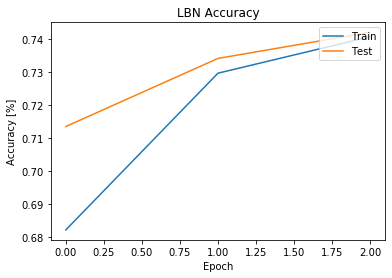

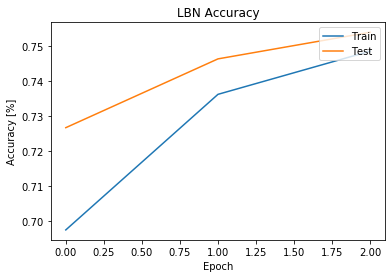

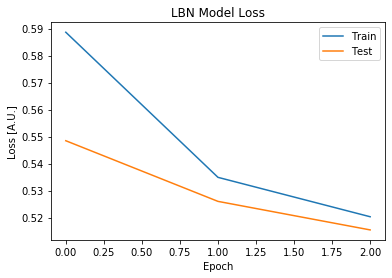

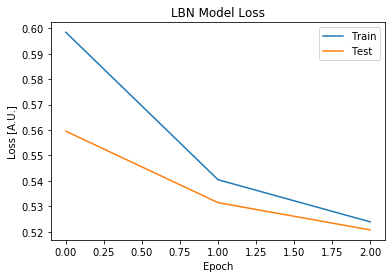

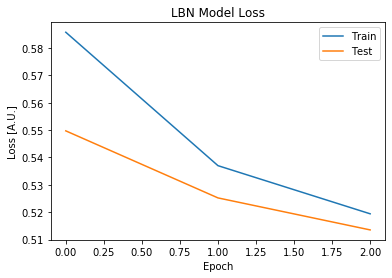

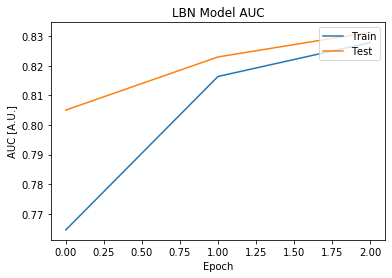

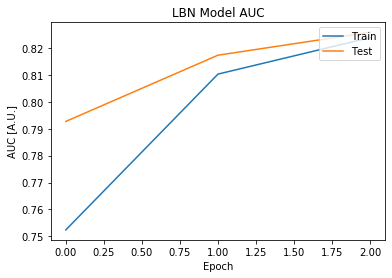

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step4/testPSO_v5_step4_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 46
nodesInSecondHiddenLayer = 109
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step4/testPSO_v5_step4.hdf5
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step1/testPSO_v5_step1_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 42
nodesInSecondHiddenLayer = 90
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step1/testPSO_v5_step1.hdf5


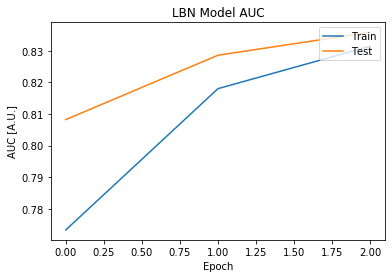

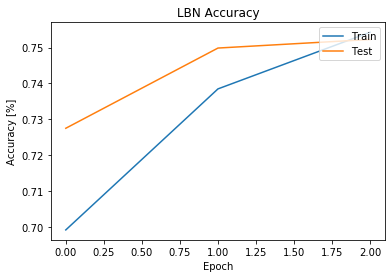

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step2/testPSO_v5_step2_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 186
nodesInSecondHiddenLayer = 4
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step2/testPSO_v5_step2.hdf5


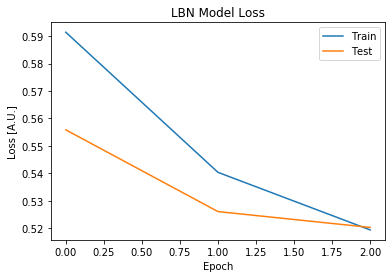

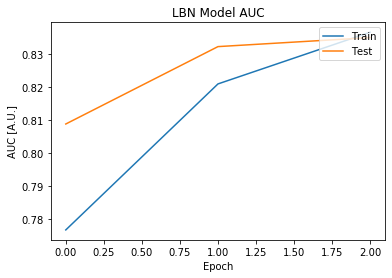

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step3/testPSO_v5_step3_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 120
nodesInSecondHiddenLayer = 190
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step3/testPSO_v5_step3.hdf5


pyswarms.single.global_best:  10%|█         |1/10, best_cost=0.164

<ForkProcess(ForkPoolWorker-4, started daemon)> 7272 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 7269 1
<ForkProcess(ForkPoolWorker-2, started daemon)> 7270 2
<ForkProcess(ForkPoolWorker-3, started daemon)> 7271 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 186
nLBNParticles = 5
nLBNParticles = 5
nLBNParticles = 5
nodesInFirstHiddenLayer = 129
nodesInFirstHiddenLayer = 62
nodesInSecondHiddenLayer = 81
nodesInSecondHiddenLayer = 5
hiddenActivation = relu
nodesInSecondHiddenLayer = 150
nodesInFirstHiddenLayer = 63
hiddenActivation = relu
nodesInSecondHiddenLayer = 81
outputActivation = sigmoid
lossFunction = binary_crossentropy
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ Beg

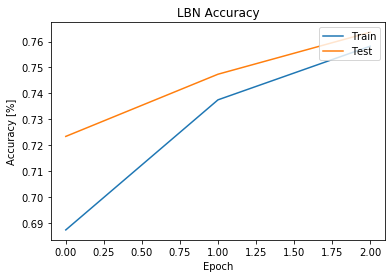

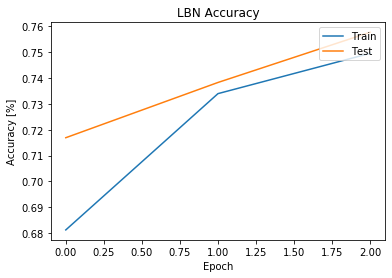

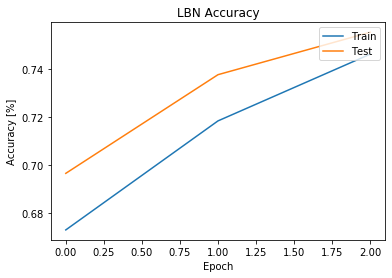

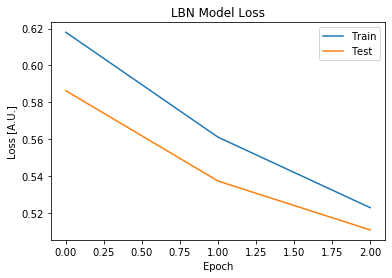

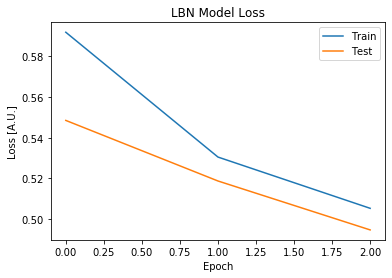

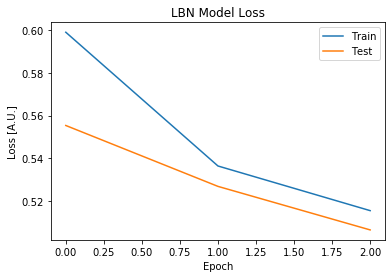

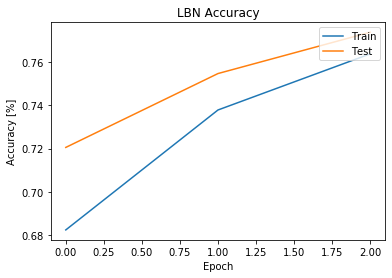

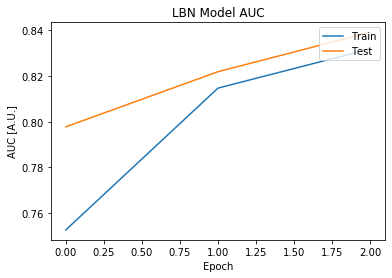

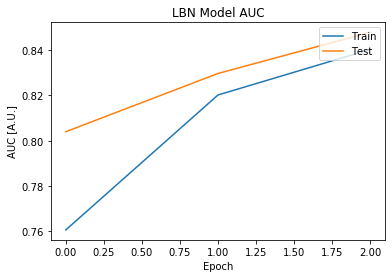

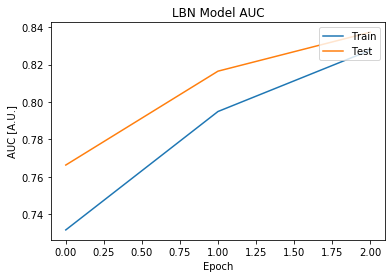

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step7/testPSO_v5_step7_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step8/testPSO_v5_step8_hyperparameters.json
++ Setting hyperparameters...
nodesInFirstHiddenLayer = 63
++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step6/testPSO_v5_step6_hyperparameters.json
++ Setting hyperparameters...
nodesInSecondHiddenLayer = 81
nLBNParticles = 5
hiddenActivation = relu
nLBNParticles = 5
nodesInFirstHiddenLayer = 62
nodesInSecondHiddenLayer = 81
nodesInFirstHiddenLayer = 186
outputActivation = sigmoid
nodesInSecondHiddenLayer = 5
hiddenActivation = relu
hiddenActivation = relu
lossFunction = binary_crossentropy
outputActivation = sigmoid
lossFunction = binary_crossentropy


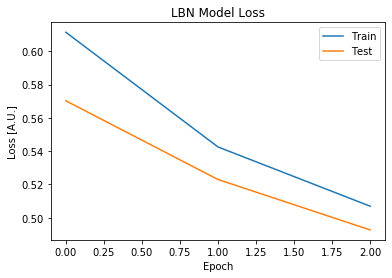

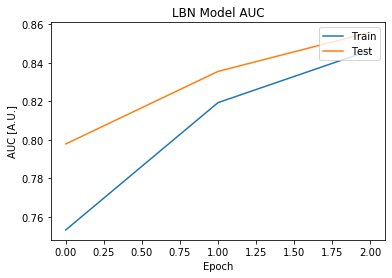

++ loading hyperparameters from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step5/testPSO_v5_step5_hyperparameters.json
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 129
nodesInSecondHiddenLayer = 150
hiddenActivation = relu
outputActivation = sigmoid
lossFunction = binary_crossentropy
++ loading model from /home/btannenw/Desktop/ML/dihiggsMLProject/lorentzBoostNetwork/lbn/models/testPSO_v5_step5/testPSO_v5_step5.hdf5


pyswarms.single.global_best:  20%|██        |2/10, best_cost=0.144

<ForkProcess(ForkPoolWorker-4, started daemon)> 7272 4
<ForkProcess(ForkPoolWorker-1, started daemon)> 7269 1
<ForkProcess(ForkPoolWorker-2, started daemon)> 7270 2
<ForkProcess(ForkPoolWorker-3, started daemon)> 7271 3
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
++ Setting hyperparameters...
nLBNParticles = 5
nodesInFirstHiddenLayer = 178
nLBNParticles = 5
nLBNParticles = 5
nodesInSecondHiddenLayer = 36
nodesInFirstHiddenLayer = 83
hiddenActivation = relu
nLBNParticles = 5
outputActivation = sigmoid
nodesInFirstHiddenLayer = 80
nodesInSecondHiddenLayer = 88
hiddenActivation = relu
nodesInSecondHiddenLayer = 62
lossFunction = binary_crossentropy
outputActivation = sigmoid
hiddenActivation = relu
nodesInFirstHiddenLayer = 138
nodesInSecondHiddenLayer = 114
outputActivation = sigmoid
lossFunction = binary_crossentropy
lossFunction = binary_crossentropy
hiddenActivation = relu
++ Begin model training
outputActivation = sigmoid
++ Begin model t

In [ ]:
%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

param_name = ['nodesInFirstHiddenLayer','nodesInSecondHiddenLayer']
n_dimensions = len(param_name)
param_max_list = [200,200]
param_min_list = [0,0]
param_max = np.array(param_max_list)
param_min = np.array(param_min_list)
bounds = (param_min, param_max)

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=4, dimensions=n_dimensions, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f_LBN_swarm, iters=10, n_processes=4)

In [ ]:
param_name = ['nodesInFirstHiddenLayer','nodesInSecondHiddenLayer']
n_dimensions = len(param_name)
param_max_list = [200,200]
param_min_list = [0,0]
param_max = np.array(param_max_list)
param_min = np.array(param_min_list)
bounds = (param_min, param_max)
# *** 2. set options
#options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9} # can use grid search to get a better value of those parameters
#options = {'c1': 2.05, 'c2': 2.05, 'w': 0.7} # try this afterwards
options = {'c1': 0.8, 'c2': 0.6, 'w': 0.35} 
optimizer = GlobalBestPSO(n_particles=5, dimensions=n_dimensions, options=options, bounds=bounds)
cost, pos = optimizer.optimize(test.fit_model(), iters=5, data=score_km_train_norm, labels=labels_train_np, param_list=param_name, n_processes=4)
#test.fit_model(epochs=3, batch_size=400, patience=10)

In [ ]:
from IPython.display import Image
from pyswarms.utils.plotters.formatters import Mesher, Designer
d = Designer(limits=[(0,50), (0,5)],
             label=['reg_alpha', 'min_child_weight'])
animation = plot_contour(pos_history=optimizer.pos_history, designer=d)
animation.save('plot0.gif', writer='imagemagick', fps=1)
Image(url='plot0.gif')

In [ ]:
model_dir = os.path.join('./', "lbn", "models")

dir_list = [d for d in os.walk(model_dir) if d.is_directory()]
#for subdir, dirs, files in os.walk(model_dir):
#    for iDir in dirs:
#        print( os.path.join(model_dir, iDir) )
#    for file in files:
#        print( os.path.join(model_dir, iDir) )

#print(model_dir)

In [ ]:
previousRuns = []
modelStem = 'testPSO_v0_stdep'
for d, s, f in os.walk(model_dir):
    #print(d.split('\n'))
    for dd in d.split('\n'):
    #    print (dd)
        if modelStem in dd:
            print (dd)
            previousRuns.append(int(dd.split(modelStem)[1]))
print(previousRuns)
a = max(previousRuns)+1 if len(previousRuns)> 0 else 0
a

In [ ]:
int(mp.current_process().pid

In [ ]:
#import multiprocessing as mp

def f(x):
    idx = mp.Queue().get()
    process = multiprocessing.current_process()
    #sleep(1)
    #return (idx, process.pid, x * x)

    print (process, mp.current_process().pid, idx)
    #return x * x

p = mp.Pool()
print (p.map(f, range(4)))

In [ ]:
t = mp.active_children()

In [ ]:
print(t)
a = [ str(x).split('-')[1].split(',')[0] for x in t]
print (a)

In [ ]:
ids = [0, 1, 2, 3]
manager = mp.Manager()
idQueue = manager.Queue()

for i in ids:
    idQueue.put(i)

In [ ]:
np.abs(4*np.random.normal())

In [ ]:
sleep(np.abs(4*np.random.normal()))

In [ ]:
from time import sleep

In [ ]:
_delay = np.abs(3*np.random.normal())
print(_delay)
sleep(_delay)